In [1]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('astroandes.mplstyle')

In [114]:
n_box = 20
mean_tan_vel_all = np.ones(n_box)
mean_tan_vel_high = np.ones(n_box)

error_tan_vel_all = np.ones(n_box)
error_tan_vel_high = np.ones(n_box)


mean_rad_vel_all = np.ones(n_box)
mean_rad_vel_high = np.ones(n_box)

error_rad_vel_all = np.ones(n_box)
error_rad_vel_high = np.ones(n_box)

circular_beta_all = np.ones(n_box)
circular_beta_high = np.ones(n_box)


error_circular_beta_all = np.ones(n_box)
error_circular_beta_high = np.ones(n_box)

all_tan_vel = np.empty((0))
all_rad_vel =  np.empty((0))
all_pec_vel =  np.empty((0))

for box_id in range(n_box):
    filename = '../data/abacus/summary_velocities_abacus_planck_00_box_{:02d}.dat'.format(box_id)
    data = np.loadtxt(filename)
    pec_vel = data[:,0]
    tan_vel = np.log10(data[:,1])
    rad_vel = data[:,2]
    
    all_pec_vel = np.append(all_pec_vel, pec_vel)
    all_tan_vel = np.append(all_tan_vel, tan_vel)
    all_rad_vel = np.append(all_rad_vel, rad_vel)
    
    beta = 1.0 - 0.5*(tan_vel**2/rad_vel**2)
    
    ii = np.argsort(pec_vel)
    nn = len(pec_vel)
    ii4 = ii[-nn//4:]
    mean_tan_vel_all[box_id] = np.mean(tan_vel)
    mean_tan_vel_high[box_id] = np.mean(tan_vel[ii4])
    error_tan_vel_all[box_id] = np.std(tan_vel)/np.sqrt(np.count_nonzero(tan_vel))
    error_tan_vel_high[box_id] = np.std(tan_vel[ii4])/np.sqrt(np.count_nonzero(tan_vel[ii4]))
    mean_rad_vel_all[box_id] = np.mean(rad_vel)
    mean_rad_vel_high[box_id] = np.mean(rad_vel[ii4])
    error_rad_vel_all[box_id] = np.std(rad_vel)/np.sqrt(np.count_nonzero(rad_vel))
    error_rad_vel_high[box_id] = np.std(rad_vel[ii4])/np.sqrt(np.count_nonzero(rad_vel[ii4]))
    circular_beta_all[box_id] = 100*np.count_nonzero(beta>0.0)/np.count_nonzero(beta)
    circular_beta_high[box_id] = 100*np.count_nonzero(beta[ii4]>0.0)/np.count_nonzero(beta[ii4])
    error_circular_beta_all[box_id] = 100*np.sqrt(np.count_nonzero(beta>0.0))/np.count_nonzero(beta)
    error_circular_beta_high[box_id] = 100*np.sqrt(np.count_nonzero(beta[ii4]>0.0))/np.count_nonzero(beta[ii4])

    

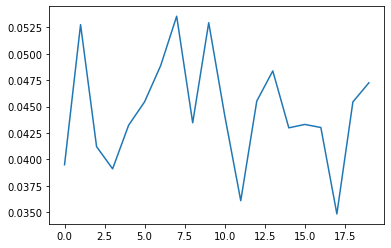

In [115]:
plt.plot(mean_tan_vel_high-mean_tan_vel_all)

<ErrorbarContainer object of 3 artists>

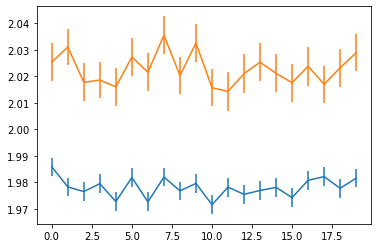

In [116]:
plt.errorbar(np.arange(n_box), mean_tan_vel_all, error_tan_vel_all)
plt.errorbar(np.arange(n_box), mean_tan_vel_high, error_tan_vel_high)

<ErrorbarContainer object of 3 artists>

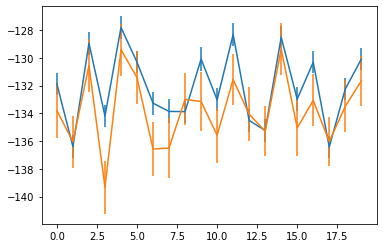

In [117]:
plt.errorbar(np.arange(n_box), mean_rad_vel_all, error_rad_vel_all)
plt.errorbar(np.arange(n_box), mean_rad_vel_high, error_rad_vel_high)

<ErrorbarContainer object of 3 artists>

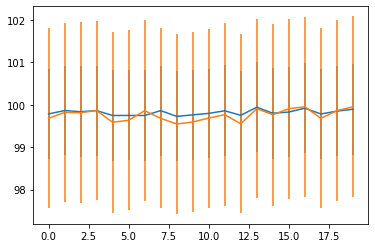

In [118]:
plt.errorbar(np.arange(n_box), circular_beta_all, error_circular_beta_all)
plt.errorbar(np.arange(n_box), circular_beta_high, error_circular_beta_high)

In [126]:
n_bins = 21
pec_vel_bins = np.linspace(0,1000,n_bins)
pec_vel_center = 0.5*(pec_vel_bins[1:]+pec_vel_bins[:-1])
mean_tan_vel = np.ones(n_bins-1)
error_tan_vel = np.ones(n_bins-1)
mean_rad_vel = np.ones(n_bins-1)
error_rad_vel = np.ones(n_bins-1)

for i in range(n_bins-1):
    min_pec_vel = pec_vel_bins[i]
    max_pec_vel = pec_vel_bins[i+1]
    ii = (all_pec_vel > min_pec_vel) & (all_pec_vel < max_pec_vel)
    mean_tan_vel[i] = np.mean(all_tan_vel[ii])
    mean_rad_vel[i] = np.mean(all_rad_vel[ii])
    error_tan_vel[i] = np.std(all_tan_vel[ii])/np.sqrt(np.count_nonzero(all_tan_vel[ii]))
    error_rad_vel[i] = np.std(all_rad_vel[ii])/np.sqrt(np.count_nonzero(all_rad_vel[ii]))

[ 1.34037158e-07 -2.30567790e-06  1.94300935e+00]


<ErrorbarContainer object of 3 artists>

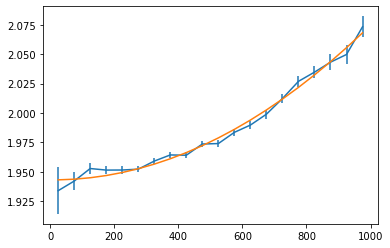

In [132]:
c = np.polyfit(pec_vel_center, mean_tan_vel, 2)
print(c)
fit_mean_tan_vel = pec_vel_center.copy()*0
for i in range(3):
    fit_mean_tan_vel += c[i] * pec_vel_center**(2-i)

plt.errorbar(pec_vel_center, mean_tan_vel, error_tan_vel)
plt.errorbar(pec_vel_center, fit_mean_tan_vel)



<ErrorbarContainer object of 3 artists>

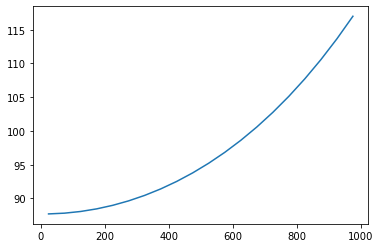

In [134]:
plt.errorbar(pec_vel_center, 10**fit_mean_tan_vel)


[-8.66073066e-06  3.35615918e-03 -1.31266741e+02]


<ErrorbarContainer object of 3 artists>

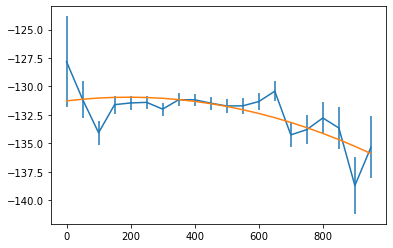

In [109]:
c = np.polyfit(pec_vel_bins[:-1], mean_rad_vel[:-1], 2)
print(c)
fit_mean_rad_vel = pec_vel_bins.copy()*0
for i in range(3):
    fit_mean_rad_vel += c[i] * pec_vel_bins**(2-i)

plt.errorbar(pec_vel_bins[:-1], mean_rad_vel[:-1], error_rad_vel[:-1])
plt.errorbar(pec_vel_bins[:-1], fit_mean_rad_vel[:-1])



(array([2.0000e+00, 5.0000e+00, 1.1000e+01, 9.0000e+00, 5.5000e+01,
        1.1600e+02, 2.7300e+02, 6.8900e+02, 1.8190e+03, 4.4620e+03,
        1.0643e+04, 2.2513e+04, 3.8595e+04, 4.8705e+04, 3.5046e+04,
        1.1247e+04, 1.9990e+03, 3.2800e+02, 4.0000e+01, 6.0000e+00]),
 array([-0.70961809, -0.5031476 , -0.2966771 , -0.09020661,  0.11626389,
         0.32273438,  0.52920487,  0.73567537,  0.94214586,  1.14861636,
         1.35508685,  1.56155735,  1.76802784,  1.97449834,  2.18096883,
         2.38743932,  2.59390982,  2.80038031,  3.00685081,  3.2133213 ,
         3.4197918 ]),
 <BarContainer object of 20 artists>)

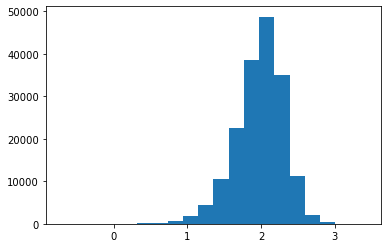

In [113]:
plt.hist(np.log10(all_tan_vel), bins=20)